# Matplotlib Homework - The Power of Plots

## Background

In this study, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens.
## Instructions

Your tasks are to do the following:

* Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.

* Use the cleaned data for the remaining steps.

* Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

* Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the total number of measurements taken for each treatment regimen throughout the course of the study.

  * **NOTE:** These plots should look identical.

* Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the distribution of female or male mice in the study.

  * **NOTE:** These plots should look identical.

* Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

* Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

  **Hint**: All four box plots should be within the same figure. Use this [Matplotlib documentation page](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) for help with changing the style of the outliers.

* Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.

* Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.

* Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

* Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

Here are some final considerations:

* You must use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, _x_-axis and _y_-axis limits, etc.

## Observations and Insights 


1. Tumor size in increases proportionate to mouse weight.

2. Capomulin was more effective at reducing the size of tumors than Infubinol and Ceftamin. Campulin's results are comparable to Ramicane's results (though Ramicane had slightly more posisitve results).
3. Capomulin and Ramicane had the most measurements taken in the experiment. This seems to result from the fact that more mice survived the 45-day observation period when treated with Capomulin and Ramicane than those treated with other drugs.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import random
plt.style.use('ggplot')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset using inner merge
df_study_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
df_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = len(df_study_data.value_counts('Mouse ID'))

print(f'There are {mouse_count} mice in the study.')

There are 249 mice in the study.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = list(df_study_data[df_study_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False) == True]['Mouse ID'].unique())

print(f'There are {len(duplicate_mice)} mice with duplicate study results. Their IDs are: {duplicate_mice}.')

There are 1 mice with duplicate study results. Their IDs are: ['g989'].


In [4]:
# Get all the data for the duplicate mouse ID. 
df_study_data[df_study_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False) == True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean_data = df_study_data[~df_study_data['Mouse ID'].isin(duplicate_mice)]

df_clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = len(df_clean_data.value_counts('Mouse ID'))

print(f'There are {mouse_count_clean} mice in the clean data... to check our math: {mouse_count} (original study total) - {len(duplicate_mice)} (duplicates) = {mouse_count - len(duplicate_mice)}.')

There are 248 mice in the clean data... to check our math: 249 (original study total) - 1 (duplicates) = 248.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

regimen_tumor_vol_avg = df_clean_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
regimen_tumor_vol_median = df_clean_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
regimen_tumor_vol_var = df_clean_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
regimen_tumor_vol_std = df_clean_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
regimen_tumor_vol_sem = df_clean_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.
df_tumor_summary = pd.DataFrame({'mean': regimen_tumor_vol_avg,
                                 'median': regimen_tumor_vol_median,
                                 'variance': regimen_tumor_vol_var,
                                 'std_dev': regimen_tumor_vol_std,
                                 'sem': regimen_tumor_vol_sem}
                               )

df_tumor_summary

,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
df_tumor_summary2 = df_clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 
                                                                                     'median', 
                                                                                     'var', 
                                                                                     'std', 
                                                                                     'sem']
                                                                                   )

df_tumor_summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

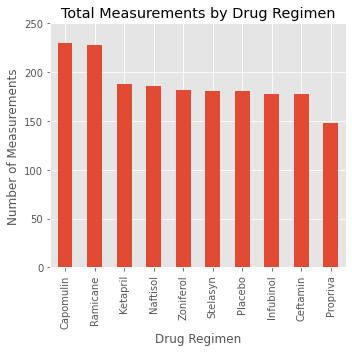

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

fig1, ax1 = plt.subplots(figsize=(5,5))

df_clean_data.value_counts('Drug Regimen').plot(kind='bar', ax=ax1)

ax1.set(title='Total Measurements by Drug Regimen',
        xlabel = 'Drug Regimen',
        ylabel = 'Number of Measurements',
        xlim = (-.5, 9.5),
        ylim = (0, 250)
       )

fig1.tight_layout()

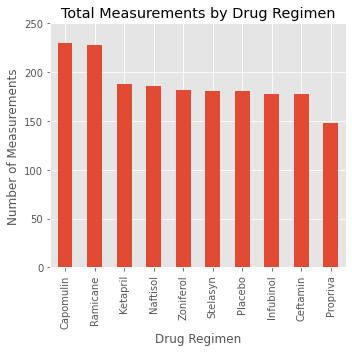

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

regimen_measurements = df_clean_data.value_counts('Drug Regimen')
x_axis = np.arange(0, len(regimen_measurements))
plt.figure(figsize=(5,5)) 
plt.title("Total Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xlim(-.5, 9.5)
plt.ylim(0, 250)
plt.bar(x_axis, regimen_measurements, width=.5)
plt.xticks(x_axis, regimen_measurements.index, rotation=90)
plt.tight_layout()
plt.show()

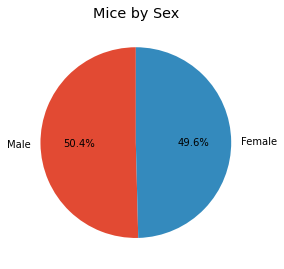

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# create data frame with one row per mouse ID

df_mice = df_clean_data.drop_duplicates(['Mouse ID'])

fig2, ax2 = plt.subplots(figsize=(4,4))

df_mice.value_counts('Sex').plot(kind='pie', ax=ax2, autopct="%1.1f%%", startangle=90);

ax2.set(title = 'Mice by Sex',
        ylabel = ''
       )

fig2.tight_layout()


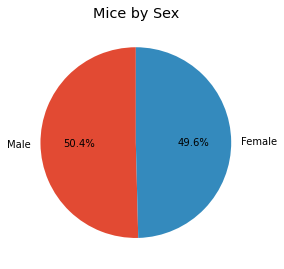

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_sex = df_mice.value_counts('Sex')
plt.figure(figsize=(4,4)) 
plt.title("Mice by Sex")
plt.pie(mice_sex, labels=mice_sex.index, autopct="%1.1f%%", startangle=90)
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
df_sort = df_clean_data.sort_values(by='Timepoint', ascending=False).drop_duplicates(subset=['Mouse ID'])
df_taget_regimens = df_sort[df_sort['Drug Regimen'].isin(target_regimens)]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df_tumor_size_final = pd.merge(df_taget_regimens, df_clean_data)

df_tumor_size_final.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g316,Capomulin,Female,22,22,45,40.159220,2
1,y793,Capomulin,Male,17,17,45,31.896238,2
2,y865,Ceftamin,Male,23,26,45,64.729837,3
3,v923,Capomulin,Female,19,21,45,40.658124,2
4,p438,Ceftamin,Female,11,26,45,61.433892,1


In [14]:
# Create a function to calculate the quartiles and IQR...
# and quantitatively determine if there are any potential outliers the four treatment regimens

def count_final_tumor_outliers(regimen):
    
    '''
    This function counts the number of final tumor volume outliers for the specified drug regimen.
    '''
    
    df_target_regimen = df_tumor_size_final[df_tumor_size_final['Drug Regimen'] == regimen]
    quartiles = df_target_regimen['Tumor Volume (mm3)'].quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    upper_bound = upperq + 1.5 * iqr
    lower_bound = lowerq - 1.5 * iqr
    outliers = len(list(i for i in df_target_regimen['Tumor Volume (mm3)'] if i < lower_bound or i > upper_bound))
    
    return (f'Number of outliers in {regimen} regimen: {outliers}')

In [15]:
# use function to count outliers for target regimens 

for regimen in target_regimens:
    print(count_final_tumor_outliers(regimen))
    

Number of outliers in Capomulin regimen: 0
Number of outliers in Ramicane regimen: 0
Number of outliers in Infubinol regimen: 1
Number of outliers in Ceftamin regimen: 0


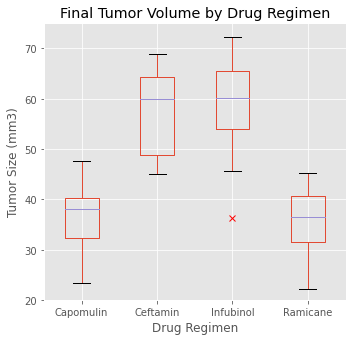

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig6, ax6 = plt.subplots(figsize=(5,5))

df_tumor_size_final[['Drug Regimen', 'Tumor Volume (mm3)']].boxplot(ax=ax6, by='Drug Regimen', flierprops={'markeredgecolor': 'r', 'marker': 'x'})

ax6.set(title=f'Final Tumor Volume by Drug Regimen',
        xlabel='Drug Regimen',
        ylabel='Tumor Size (mm3)',
        xlim = (.5, 4.5),
        ylim = (20, 75)
       )
fig6.suptitle('')
fig6.tight_layout();


## Line and Scatter Plots

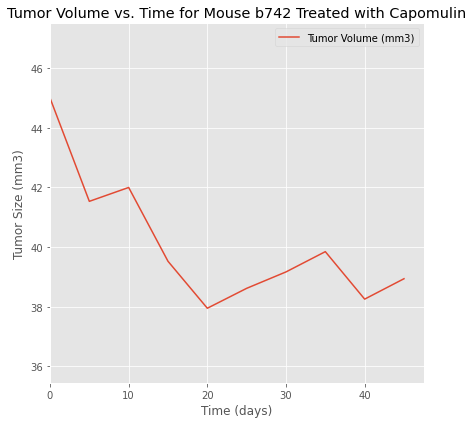

In [17]:
# Generate a line plot of tumor volume vs. time point for a random mouse treated with Capomulin

target_drug = 'Capomulin'

df_target_drug = df_clean_data[df_clean_data['Drug Regimen'] == target_drug]

random_mouse = random.choice(df_target_drug['Mouse ID'].unique())
df_target_mouse = df_target_drug[df_target_drug['Mouse ID'] == random_mouse][['Mouse ID', 
                                                                              'Timepoint', 
                                                                              'Tumor Volume (mm3)']
                                                                            ]

fig3, ax3 = plt.subplots(figsize=(6,6))
df_target_mouse.plot(kind='line', ax=ax3, x='Timepoint', y='Tumor Volume (mm3)')
ax3.set(title=f'Tumor Volume vs. Time for Mouse {random_mouse} Treated with {target_drug}',
        xlim=(0, max(df_target_mouse['Timepoint']) + 2.5),
        xlabel='Time (days)',
        ylim=(min(df_target_mouse['Tumor Volume (mm3)']) - 2.5, max(df_target_mouse['Tumor Volume (mm3)']) + 2.5),
        ylabel='Tumor Size (mm3)'
       )

ax3.legend(loc='upper right')

fig3.tight_layout();

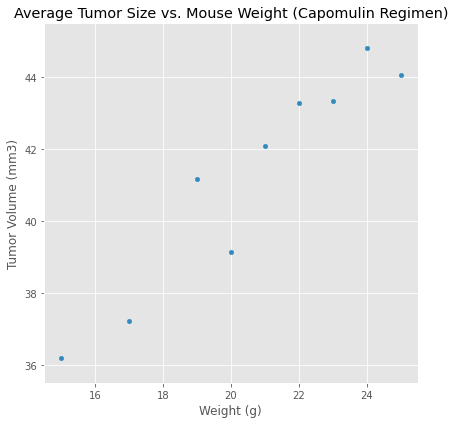

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

df_tumor_volume_avg_vs_weight = df_target_drug.groupby('Weight (g)')['Tumor Volume (mm3)'].agg('mean').reset_index()


fig4, ax4 = plt.subplots(figsize=(6,6))
df_tumor_volume_avg_vs_weight.plot(kind='scatter',
                                   ax=ax4,
                                   x='Weight (g)',
                                   y='Tumor Volume (mm3)'
                                  )

ax4.set(title='Average Tumor Size vs. Mouse Weight (Capomulin Regimen)',
        xlim=(14.5,25.5),
        ylim=(35.5,45.5)
       )

fig4.tight_layout();

## Correlation and Regression

The correlation between average tumor volume and mouse weight is: 0.95


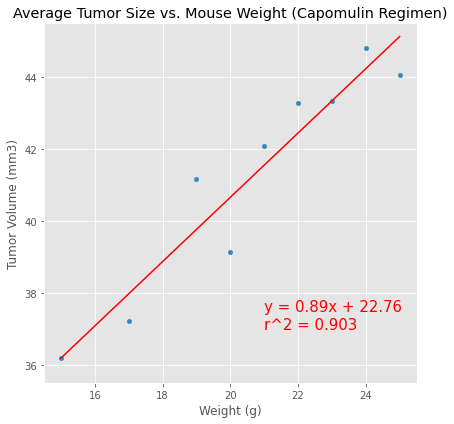

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = df_tumor_volume_avg_vs_weight['Weight (g)']
tumor_volume_avg = df_tumor_volume_avg_vs_weight['Tumor Volume (mm3)']

# calculate and plot the regression line on the scatter plot

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, tumor_volume_avg)
regress_values = mouse_weight * slope + intercept
regress_eq = (f'''y = {str(round(slope, 2))}x + {str(round(intercept, 2))}
r^2 = {round(rvalue**2,3)}''')

fig5, ax5 = plt.subplots(figsize=(6,6))
df_tumor_volume_avg_vs_weight.plot(kind='scatter',
                                   ax=ax5,
                                   x='Weight (g)',
                                   y='Tumor Volume (mm3)'
                                  )

ax5.plot(mouse_weight, regress_values, color = 'r')
ax5.annotate(regress_eq, (21,37), color = 'r', fontsize=15)

ax5.set(title='Average Tumor Size vs. Mouse Weight (Capomulin Regimen)',
        xlim=(14.5,25.5),
        ylim=(35.5,45.5)
       )

fig5.tight_layout();

# calculate and print the correlation

correlation = st.pearsonr(mouse_weight, tumor_volume_avg)

print(f'The correlation between average tumor volume and mouse weight is: {round(correlation[0], 2)}')